In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
data_train_path = '/content/drive/MyDrive/Neural Network - Subodh sir/Week 4/dataset/seg_train/seg_train'
data_test_path = '/content/drive/MyDrive/Neural Network - Subodh sir/Week 4/dataset/seg_test/seg_test'
data_val_path = '/content/drive/MyDrive/Neural Network - Subodh sir/Week 4/dataset/seg_pred/seg_val/seg_val'

In [5]:
img_width = 180
img_height =180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3422 files belonging to 6 classes.


In [7]:
data_set = data_train.class_names

In [8]:
data_set

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [9]:
ls "{data_val_path}"

buildings/  forest/  glacier/  mountain/  sea/  street/


In [10]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height,img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False)

Found 358 files belonging to 6 classes.


In [11]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 759 files belonging to 6 classes.


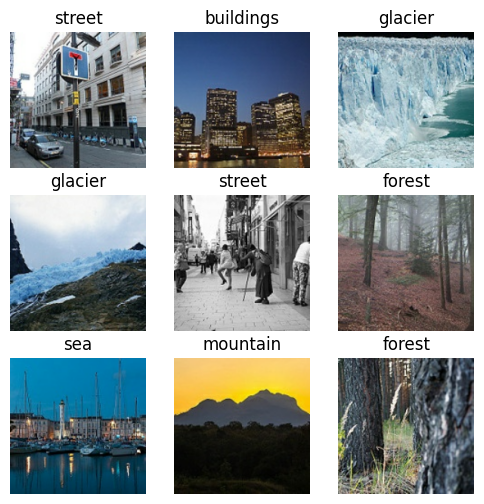

In [12]:
plt.figure(figsize=(6,6))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_set[labels[i]])
        plt.axis('off')

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1) ))
model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#with Padding
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1) ))
model.add(Conv2D(16,kernel_size=(3,3), padding='same',activation='relu'))
model.add(Conv2D(8,kernel_size=(3,3), padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │         125,460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,774 (514.74 KB)

 Trainable params: 131,774 (514.74 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.optimizers import Adam

# Initialize the model
model = Sequential()

# Add layers to the model
model.add(Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'))

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

# Flatten and Fully Connected layers
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(data_set), activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 180, 180, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 180, 180, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 90, 90, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       8,294,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,309,638 (31.70 MB)

 Trainable params: 8,309,638 (31.70 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [22]:
epochs_size = 10
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


107/107 ━━━━━━━━━━━━━━━━━━━━ 416s 4s/step - accuracy: 0.3257 - loss: 2.9964 - val_accuracy: 0.5978 - val_loss: 1.0437
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 366s 3s/step - accuracy: 0.6034 - loss: 1.0210 - val_accuracy: 0.6397 - val_loss: 0.9691
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 347s 3s/step - accuracy: 0.6935 - loss: 0.8042 - val_accuracy: 0.5866 - val_loss: 1.0428
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 371s 3s/step - accuracy: 0.7602 - loss: 0.6630 - val_accuracy: 0.6173 - val_loss: 1.0151
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - accuracy: 0.8521 - loss: 0.4279 - val_accuracy: 0.6564 - val_loss: 1.0368
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 382s 3s/step - accuracy: 0.9046 - loss: 0.2857 - val_accuracy: 0.6955 - val_loss: 1.1344
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.9509 - loss: 0.1568 - val_accuracy: 0.6620 - val_loss: 1.3666
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 386s 3s/step - accuracy: 0.9461 - loss: 0.1715 - val_accuracy: 0.662

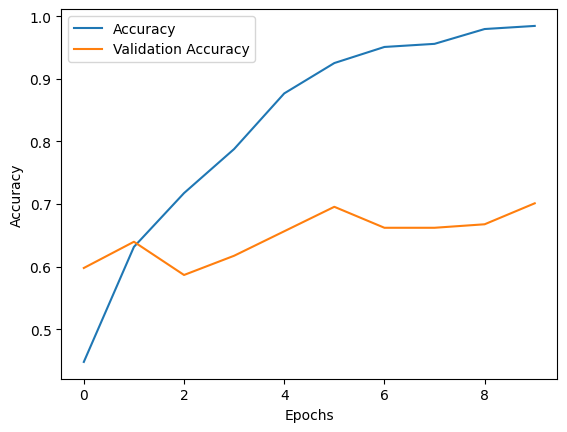

In [25]:
# Visualize training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
# Predictions and metrics
y_true = []
y_pred = []

for images, labels in data_test:
    preds = tf.argmax(model.predict(images), axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step


In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 65   8   7   3   9  14]
 [  2 118   1   1   0   6]
 [  7   0 108  17  28   3]
 [  7   1  23  79  26   0]
 [  5   0  22  14  69   2]
 [ 19  14   1   2   3  75]]


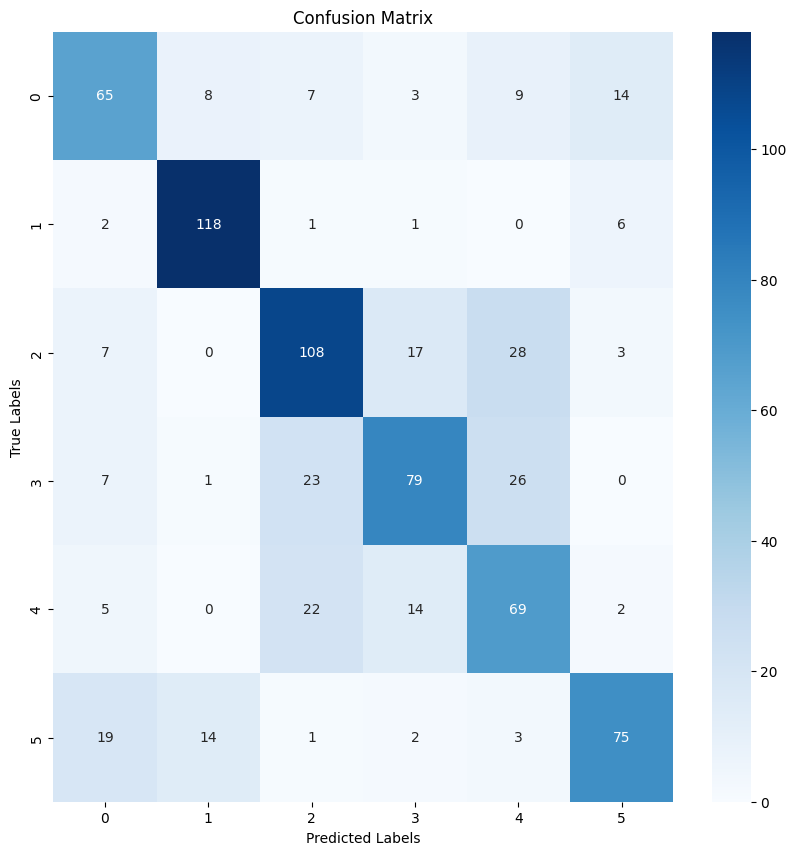

In [36]:
# Plot confusion matrix using seaborn and matplotlib
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [28]:
# Calculate precision, recall, and F1-score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.6808582552848718
Recall: 0.6772068511198946
F1 Score: 0.6767971600068556


In [38]:
test_loss, test_acc = model.evaluate(data_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 886ms/step - accuracy: 0.7043 - loss: 1.7818
Test Accuracy: 67.72%


In [29]:
# Classification report
print(classification_report(y_true, y_pred, target_names=data_set))

              precision    recall  f1-score   support

   buildings       0.62      0.61      0.62       106
      forest       0.84      0.92      0.88       128
     glacier       0.67      0.66      0.66       163
    mountain       0.68      0.58      0.63       136
         sea       0.51      0.62      0.56       112
      street       0.75      0.66      0.70       114

    accuracy                           0.68       759
   macro avg       0.68      0.68      0.67       759
weighted avg       0.68      0.68      0.68       759



In [30]:
# Test a single image
image_path = '/content/drive/MyDrive/Neural Network - Subodh sir/Week 4/dataset/seg_test/seg_test/glacier/20087.jpg'
image = tf.keras.utils.load_img(image_path, target_size=(img_width, img_height))
img_array = tf.keras.utils.img_to_array(image)
img_batch = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_batch)
predicted_class = data_set[np.argmax(predictions)]
print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
The predicted class is: glacier


In [32]:
print('This image is of a Natural scene of {} with accuracy of {:0.2f}'.format(data_set[np.argmax(predictions)],np.max(predictions)*100))

This image is of a Natural scene of glacier with accuracy of 99.97


In [34]:
image = '/content/drive/MyDrive/Neural Network - Subodh sir/Week 4/dataset/seg_test/seg_test/street/20194.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_batch=tf.expand_dims(img_arr,0)

predictions = model.predict(img_batch)
predicted_class = data_set[np.argmax(predictions)]
print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
The predicted class is: street
